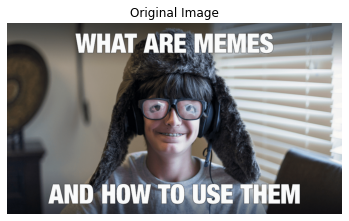

In [12]:
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
import string

img_path = 'test_images/meme-3.png'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
plt.show()

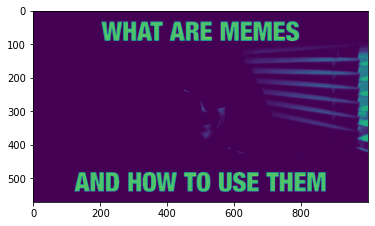

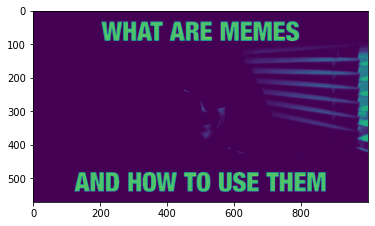

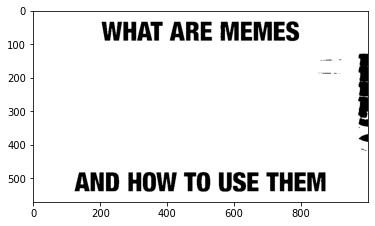

WHAT ARE MEMES
:
AND HOW TO USE THEM
 
WHAT ARE MEMES
AND HOW TO USE THEM
WHAT ARE MEMES
AND HOW TO USE THEM


In [13]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Grayscale, Gaussian blur, Otsu's threshold
gray = get_grayscale(img)
gray = ((gray/255)**20 * 255).astype(np.uint8)
plt.imshow(gray)
plt.show()
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

def helper(gray):
    gray = ((gray/255)**20 * 255).astype(np.uint8)
    plt.imshow(gray)
    plt.show()
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    invert = 255 - opening
    plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
    plt.show()
    data = pytesseract.image_to_string(thresh, lang='eng', config='--psm 6')
    print(data, "\n=======")
    allowed = string.ascii_uppercase+string.ascii_lowercase + " ?"
    lines = data.split("\n")
    res = []
    for line in lines:
        t = []
        correct = 0
        for i in line:
            if i in allowed:
                t.append(i)
                correct+=1
            elif i in "1234567890":
                t.append(i)
            elif len(t) > 0 and t[-1] != " ":
                t.append(" ")
        if correct > len(line)*3/5 and correct > 2:
            res.append("".join(t))
    data = "\n".join(res)
    print(data)
    return data

def process(image):
    gray = get_grayscale(img)
    a = helper(gray)
    return a
    #b = helper(255-gray)
    #return a if len(a) > len(b) else b
print(process(img))

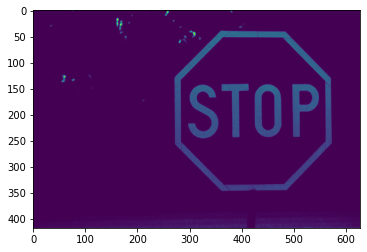

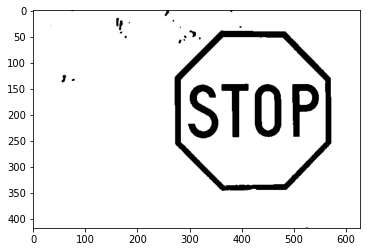

In [116]:

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

In [111]:
# Perform text extraction
data = pytesseract.image_to_string(thresh, lang='eng', config='--psm 6')
print(data, "\n=======")
allowed = string.ascii_uppercase+string.ascii_lowercase + "?"
lines = data.split("\n")
res = []
for line in lines:
    t = []
    correct = 0
    for i in line:
        if i in allowed:
            t.append(i)
            correct+=1
        elif len(t) > 0 and t[-1] != " ":
            t.append(" ")
    if correct > len(line)*3/5:
        res.append("".join(t))
data = "\n".join(res)
print(data)

o 1 i o
f_ "_.»_ =
,'
 



In [231]:
## The text is saved in an object called Data use this block to manipulate data 
## To get the correct text. e.g Filter out characters that wouldn't appear 
## Add spaces if 2 words are put together. 


In [216]:
## This is a bounding box method with tesseraact not EAST
d = pytesseract.image_to_data(thresh, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


number of boxes: 13


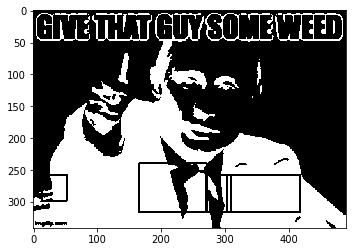

In [232]:
## This plots the bounded boxes on top of an image. 
## Does not work well for memes
n_boxes = len(d['text'])
print('number of boxes: {}'.format(n_boxes))
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Region of interest basically a word in the image
        r = img[y:y+h,x:x+w]
        thresh = cv2.rectangle(thresh, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()